In [1]:
from IPython.display import Image
from IPython.display import Video

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784")

C:\Users\hallgato\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
data = mnist.data
labels = mnist.target

In [5]:
# 28x28
data.shape

(70000, 784)

In [6]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import matplotlib.pyplot as plt

def viz(test_img, test_label, size=(28,28)):
    plt.imshow(test_img.reshape(size[0], size[1]), cmap="Greys")
    plt.axis('off')
    plt.title(str(test_label))
    plt.show

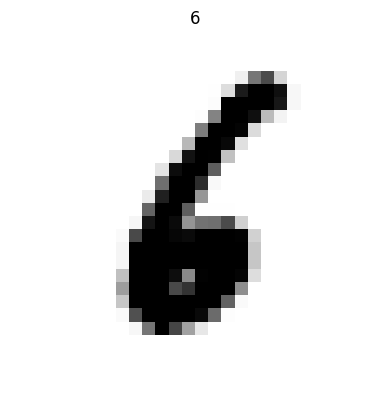

In [8]:
import numpy as np

choise = np.random.choice(np.arange(data.shape[0]+1))
# Teszt kép kiválasztása
test_img = data.iloc[choise].values

# Teszt label kiválasztása
test_label = mnist.target.iloc[choise]
viz(test_img, test_label)

In [9]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

n_data = normalize(data.values)
n_data.shape

(70000, 784)

In [10]:
def one_hot_encode(x: np.ndarray, num_labels: int) -> np.ndarray:
    return np.eye(num_labels)[x]

# Felosszuk tanuló és teszt adatra

In [11]:
train_test_split_no = int(n_data.shape[0] * 0.8)
train_test_split_no

56000

In [12]:
x_train = n_data[:train_test_split_no]
y_train = labels[:train_test_split_no].values.astype(int)
y_train = one_hot_encode(y_train, 10)

x_train.shape, y_train

((56000, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [13]:
x_test = n_data[train_test_split_no:]
y_test = labels[train_test_split_no:].values.astype(int)
y_test = one_hot_encode(y_test, 10)

x_test.shape

(14000, 784)

In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((x_train.shape[1])),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
for layer in model.get_weights():
    print(layer.shape)

(784, 128)
(128,)
(128, 10)
(10,)


In [19]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
x = tf.ones((3, x_train.shape[1]))
model(x)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.68714   , 0.01597491, 0.00964868, 0.11774957, 0.02348119,
        0.02024838, 0.03268562, 0.00654459, 0.03545723, 0.05106987],
       [0.68714   , 0.01597491, 0.00964868, 0.11774957, 0.02348119,
        0.02024838, 0.03268562, 0.00654459, 0.03545723, 0.05106987],
       [0.68714   , 0.01597491, 0.00964868, 0.11774957, 0.02348119,
        0.02024838, 0.03268562, 0.00654459, 0.03545723, 0.05106987]],
      dtype=float32)>

In [20]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2678 - accuracy: 0.9242
Epoch 2/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1156 - accuracy: 0.9657
Epoch 3/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9761
Epoch 4/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9807
Epoch 5/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9853


In [21]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9763


[0.07960914075374603, 0.9762856960296631]

In [23]:
choise = np.random.choice(np.arange(x_test.shape[0]+1))
test_input = x_test[choise]
print(y_test[choise])
model.predict(np.array([test_input]))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 116ms/step


array([[6.4524192e-14, 2.5578040e-06, 8.4926393e-07, 9.9999082e-01,
        4.0239432e-14, 5.5178220e-06, 1.9396431e-16, 3.2604688e-09,
        5.2736549e-08, 1.2947969e-07]], dtype=float32)

In [ ]:
choise = np.random.choice(np.arange(x_test.shape[0]+1))
viz(x_test[choise], np.argmax(y_test[choise]))